# Introduction to Scikit-Learn (SKLearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.


In [4]:
What_we_are_going_to_cover = [
"0. An end-to-end Scikit-Learn workflow",
"1. Getting the data ready",
"2. Choose the right estimator/algorithm for our problems",
"3. Fit the model/algorithm and use it to make predictions on our data",
"4. Evaluating a model",
"5. Improve a model",
"6. Save and load a trained model",
"7. Putting it all together!"]

# 0. An end-to-end Scikit-Learn Workflow

In [5]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
# Create X (Feature matrix)
X = heart_disease.drop("target", axis=1)

# create Y (labels)
y = heart_disease["target"]

In [8]:
# import warnings
# warnings.filterwarnings(ignore, message='Brr')

In [9]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [10]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [11]:
clf.fit(X_train, y_train);

In [12]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3


In [13]:
# make a prediction
#y_label = clf.predict(np.array  )

In [14]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [15]:
y_test

9      1
125    1
226    0
238    0
110    1
      ..
58     1
172    0
193    0
167    0
302    0
Name: target, Length: 61, dtype: int64

In [16]:
# 4. Evaluate the model
clf.score(X_train, y_train)

1.0

In [17]:
clf.score(X_test, y_test)

0.7868852459016393

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77        29
           1       0.79      0.81      0.80        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [19]:
confusion_matrix(y_test, y_preds)

array([[22,  7],
       [ 6, 26]], dtype=int64)

In [20]:
accuracy_score(y_test,y_preds)

0.7868852459016393

In [21]:
from sklearn.metrics import confusion_matrix

# true labels
y_true = [1, 0, 1, 1, 0, 1]

# predicted labels
y_pred = [1, 0, 1, 0, 0, 1]

cm = confusion_matrix(y_true, y_pred)
print(cm)

[[2 0]
 [1 3]]


In [22]:
# 5. Improve a model
# Try different amount of n_estimators

np.random.seed(42)
for i in range(10, 100, 10):
    print(f'Trying model with {i} estimators...')
    clf = RandomForestClassifier(n_estimators= i).fit(X_train, y_train)
    print(f"model accuracy on test set: {clf.score(X_test, y_test) *100:.2f}%")
    print(" ")

Trying model with 10 estimators...
model accuracy on test set: 78.69%
 
Trying model with 20 estimators...
model accuracy on test set: 80.33%
 
Trying model with 30 estimators...
model accuracy on test set: 75.41%
 
Trying model with 40 estimators...
model accuracy on test set: 77.05%
 
Trying model with 50 estimators...
model accuracy on test set: 73.77%
 
Trying model with 60 estimators...
model accuracy on test set: 75.41%
 
Trying model with 70 estimators...
model accuracy on test set: 75.41%
 
Trying model with 80 estimators...
model accuracy on test set: 77.05%
 
Trying model with 90 estimators...
model accuracy on test set: 77.05%
 


In [23]:
# 6. save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", 'wb'))

In [24]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.7704918032786885

## 1. Getting our data ready to be used with Machine Learning

Three main things we have to do:

    1. Split the data into features and labels (usually `X` & `y`)
    2. Filling (also called inputting) or disregarding missig Values
    3. Converting non-numerical values oto numerical values (also called feature encoding)

In [25]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
X = heart_disease.drop("target", axis= 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [27]:
y = heart_disease.target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [28]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [30]:
X.shape

(303, 13)

In [31]:
len(heart_disease)

303

### 1.1 Make sure it's all numerical

In [32]:
car_sales = pd.read_csv("../data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [33]:
len(car_sales)

1000

In [34]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [35]:
# Split into X and y
X = car_sales.drop("Price", axis= 1)
y = car_sales.Price

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [36]:
# build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [37]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features,)],
                                remainder= "passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [38]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [39]:
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [40]:
# let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

In [41]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. fill them with some values (imputation)
2. Remove the samples with missing data altogether

In [42]:
# import car sales missing data

car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [43]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [44]:
X.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

### Option 1: Fill missing data with Pandas

In [45]:
# fill the "make" column
car_sales_missing.Make.fillna("missing", inplace= True)

# fill for "Column" 
car_sales_missing.Colour.fillna("missing", inplace= True)

# fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace= True)

# fill the "Doors" column
car_sales_missing.Doors.fillna(4, inplace= True)

In [46]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [47]:
# Remove the rows with missing price values

car_sales_missing.dropna(inplace= True)

In [48]:
# check for missing values
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [49]:
# seperate into Train and Test
X = car_sales_missing.drop(columns= "Price")
y = car_sales_missing.Price

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [50]:
#Let's try converting to numbers
# turn the categories to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder= "passthrough")

transformed_X = transformer.fit_transform(X)

### Option 2: Fill Missing Values with SK learn

In [51]:
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [52]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [53]:
# rid of rows without Price
car_sales_missing.dropna(subset=["Price"], inplace= True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [54]:
# split data into X & y
X = car_sales_missing.drop(columns= "Price")
y = car_sales_missing.Price

In [55]:
# fill missing data with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" & Numerial values with mean
cat_imputer = SimpleImputer(strategy= "constant", fill_value= 'missing')
door_imputer = SimpleImputer(strategy= "constant", fill_value= 4)
num_imputer = SimpleImputer(strategy= "mean")

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing date)

imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer",  num_imputer, door_features)
])

# transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 4.0],
       ['BMW', 'Blue', 5.0, 5.0],
       ['Honda', 'White', 4.0, 4.0],
       ...,
       ['Nissan', 'Blue', 4.0, 4.0],
       ['Honda', 'White', 4.0, 4.0],
       ['Toyota', 'Blue', 4.0, 4.0]], dtype=object)

In [56]:
car_sales_filled = pd.DataFrame(filled_X,
                                columns= ['Make', 'Colour', 'Doors', 'Odometer'])

car_sales_filled.head()

,Make,Colour,Doors,Odometer
0,Honda,White,4.0,4.0
1,BMW,Blue,5.0,5.0
2,Honda,White,4.0,4.0
3,Toyota,White,4.0,4.0
4,Nissan,Blue,3.0,3.0


In [57]:
car_sales_filled.isna().sum()

Make        0
Colour      0
Doors       0
Odometer    0
dtype: int64

In [58]:
#Let's try converting to numbers
# turn the categories to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder= "passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)

In [59]:
# now we've got our data as numbers and filled
# let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,  X_test, y_train, y_test = train_test_split(transformed_X,
                                                      y,
                                                     test_size= 0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)

model.score(X_test, y_test)

0.09067187966370238

## 2. Choosing the right estimator/algorithm for your problem

some things to note:

* Sklearn refers to machine learning models, algorithms as estimators.
* Classification Problem - Predicting a category (heart disease or not)
    * sometimes you'll see `clƒ` (short for classifier)
* Regression problem - predicting a number/value

if you're working on a machine learning model https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem

let's use the [california housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html)

In [60]:
# Get California Housing Dataset
# from sklearn.datasets import fetch_california_housing

# housing = fetch_california_housing()
# housing

In [61]:
housing = pd.read_csv("../data/California.csv")
housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [62]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [63]:
housing.rename(columns={"MedHouseVal":"target"}, inplace=True)

In [64]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [65]:
# import algorithm
from sklearn.linear_model import Ridge

# setup random seed
np.random.seed(42)

# create the data
X = housing.drop(columns=["target"])
y = housing.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# check the score of the model (on the test set)
model.score(X_test, y_test)

0.5758549611440127

#### Accuracy of .58 with the Ridge()

In [66]:
# import algorithm
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

# create the data
X = housing.drop(columns=["target"])
y = housing.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

# Instantiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# check the score of the model (on the test set)
model.score(X_test, y_test)

0.8059837014172988

In [67]:
# import algorithm
from sklearn.linear_model import LinearRegression

# setup random seed
np.random.seed(42)

# create the data
X = housing.drop(columns=["target"])
y = housing.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

# Instantiate and fit the model (on the training set)
model = LinearRegression()
model.fit(X_train, y_train)

# check the score of the model (on the test set)
model.score(X_test, y_test)

0.5757877060324512

## Picking a machine learning model for classification

In [68]:
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [69]:
len(heart_disease)

303

The sklearn map says to use `LinearSVC`

In [70]:
# import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# setup random seed
np.random.seed(42)

# make the data
X = heart_disease.drop(columns={"target"})
y = heart_disease.target

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSvc
model = LinearSVC()
model.fit(X_train, y_train)

# check accuracy score
model.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.8688524590163934

Trying ensemble methods = `RandomForestClassifier`

In [71]:
# import the model
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# create data
X = heart_disease.drop(columns={'target'})
y = heart_disease.target

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

# instantiate model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# check accuracy
model.score(X_test, y_test)

0.8524590163934426

Tidbit: 

        1. if you have structured data, use ensemble methods
        2. if we have unstructured data, we use deep learning or transfer learning

In [72]:
What_we_are_going_to_cover

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 3. Fit the model/algorithm on our data and using it to make predictions

### 3.1 Fitting the model to the data

Different names for:
* `X` = Feature, Feature Variables, Data
* `y` = Target, Target Variables, labels

In [73]:
# import the model
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# create data
X = heart_disease.drop(columns={'target'})
y = heart_disease.target

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

# instantiate model
model = RandomForestClassifier()

# Fit the model to the data
model.fit(X_train, y_train)

# check accuracy
model.score(X_test, y_test)

0.8524590163934426

In [74]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [75]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [76]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make Predictions using our machine learning model

2 ways to make predictions:

1. `predict()`
2. `predict.proba()`

In [77]:
# Use a trained model  to make predictions
#model.predict(np.array([1, 2, 3, 4, 5])) # This doesn't  work

In [78]:
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [79]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [80]:
# compare prediction to truth labels to evaluate the model
y_preds = model.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [81]:
model.score(X_test, y_test)

0.8524590163934426

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make Prediction with `predict_proba()`

In [83]:
# predict_proba() returns probabilities of a classification label

model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [84]:
# Let's predict() on the same data...
model.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [85]:
proba = model.predict_proba(X_test)
type(proba)

numpy.ndarray

In [86]:
proba[3][1]

0.16

`predict_proba()` can also be used for regression models

In [87]:
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [88]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data
X = housing.drop(columns={"target"})
y = housing.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate model
model = RandomForestRegressor()

# fit the model
model.fit(X_train, y_train)

# predict and accuracy
y_preds = model.predict(X_test)
model.score(X_test, y_test)

0.8059837014172988

In [89]:
y_preds[:10]

array([0.49909  , 0.74815  , 4.9334564, 2.56978  , 2.3469   , 1.6729601,
       2.30151  , 1.66775  , 2.52649  , 4.8600979])

In [90]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [91]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32672061405038777

In [92]:
housing.target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn model/estimators:

    1. Estimator's built-in `score()` method
    2. The `scoring` Parameter
    3. Problem-Specific Metric function

### 4.1 Evaluating a model with the `score` method

In [93]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop(columns={"target"})
y = heart_disease.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [94]:
clf.score(X_train, y_train)

1.0

In [95]:
clf.score(X_test, y_test)

0.8524590163934426

Let's use the `score` on our regression problem....

In [96]:
from sklearn.linear_model import Ridge

X = housing.drop(columns={'target'})
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

model = Ridge()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5932112387684654

In [97]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8099115593773317

In [98]:
housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### 4.2 Evaluating a model using the `scoring` parameter

In [99]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop(columns={"target"})
y = heart_disease.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [100]:
clf.score(X_test, y_test)

0.8524590163934426

In [101]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [102]:
np.mean(cross_val_score(clf, X, y))

0.8183606557377049

In [103]:
cross_val_score(clf, X, y, cv= 10)

array([0.90322581, 0.83870968, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.76666667, 0.83333333, 0.73333333, 0.83333333])

In [104]:
np.random.seed(42)

# single training and test split score
clf_single_score = clf.score(X_test, y_test)

# take the mean of 5 fold Cross validation
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

# compare both
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [105]:
# Default scoring parameter of classifier

In [106]:
# scoring parameter set to none by default
cross_val_score(clf, X, y, cv= 5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification Model Evaluation metrics

1. Accuracy
2. Area under ROC set_ecdh_curve
3. Confusion Matrix
4. Classification report

**Accuracy**

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop(columns={"target"})
y = heart_disease.target

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [108]:
np.mean(cross_val_score)

0.8248087431693989

In [109]:
print(f"Heart Disease Cross validated Classifier Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Cross validated Classifier Accuracy: 82.48%


**Area under the receiver operating characteristic curvr (AUC/ROC)**

* Area under curve
* ROC Curve

ROC curve area a comparison of a model's true positive rate(TPR) verses a model false positiv rate(FPR).

- A true positive is an outcome where the model correctly predicts the positive class.
- A true negative is an outcome where the model correctly predicts the negative class.
- A false positive is an outcome where the model incorrectly predicts the positive class. 
- A false negative is an outcome where the model incorrectly predicts the negative class.

In [110]:
# create X_test,.... etc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [111]:
from sklearn.metrics import roc_curve

# fit the classifier
clf.fit(X_train, y_train)

# Make Prediction with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [112]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [113]:
# calculate fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

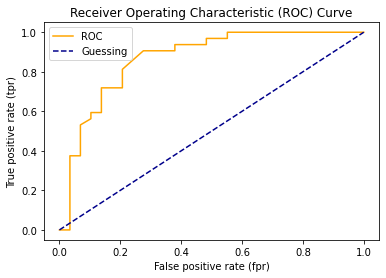

In [114]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC Curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label= "ROC")
    # plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [115]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

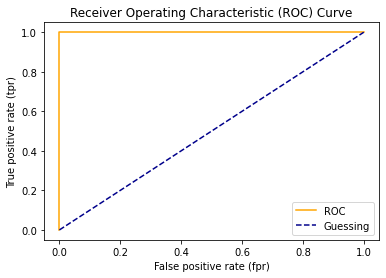

In [116]:
# plot a perfect roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [117]:
#perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a aquick way to compare the label a model prediction

in essence, giving you an idea of where the model is getting confused

In [118]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [119]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames= ["Actual Labels"],
           colnames= ["Predicted Labels"])


Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26
